Confusion Matrix:
[[65  3]
 [ 7 25]]


C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_12376\2297777258.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


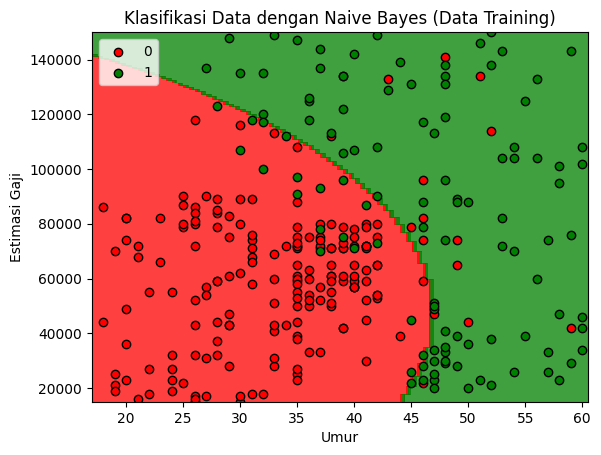

C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_12376\2297777258.py:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


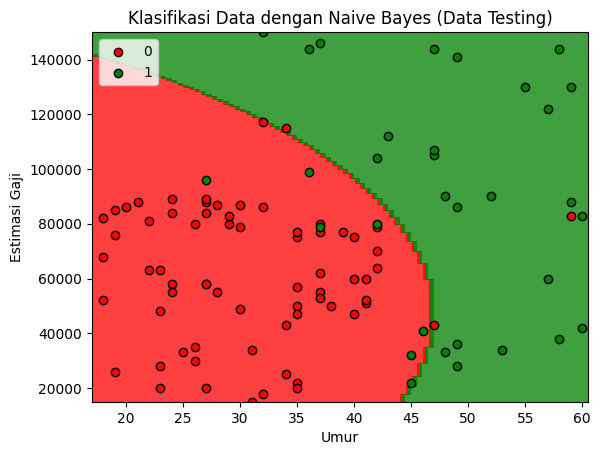

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# Memuat dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Melatih model Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Memprediksi hasil untuk set pengujian
y_pred = classifier.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualisasi hasil klasifikasi
def plot_decision_boundary(X_set, y_set, classifier, title):
    X1_min, X1_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
    X2_min, X2_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
    
    # Mengurangi resolusi grid untuk menghemat memori
    step = 0.5
    xx, yy = np.meshgrid(np.arange(X1_min, X1_max, step),
                         np.arange(X2_min, X2_max, step))
    
    # Memprediksi kelas untuk setiap titik di grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    
    # Plot titik data
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black')
    
    plt.title(title)
    plt.xlabel('Umur')
    plt.ylabel('Estimasi Gaji')
    plt.legend()
    plt.show()

# Plot decision boundary untuk data training
plot_decision_boundary(X_train, y_train, classifier, 'Klasifikasi Data dengan Naive Bayes (Data Training)')

# Plot decision boundary untuk data testing
plot_decision_boundary(X_test, y_test, classifier, 'Klasifikasi Data dengan Naive Bayes (Data Testing)')